---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/blob/main/Applied_Machine_Learning_in_Python/Week2/Labs/Classifier Visualization.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

In [1]:
%%bash
# If running in Google Colab

# mkdir data
# wget https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Machine_Learning_in_Python/Week2/Labs/data/mushrooms.csv -P ./data

# Classifier Visualization Playground

The purpose of this notebook is to let you visualize various classsifiers' decision boundaries.

The data used in this notebook is based on the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. 

In order to better vizualize the decision boundaries, we'll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

In [2]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('./data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df2 = pd.get_dummies(df)
df3 = df2.sample(frac=0.08)
df3.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6902,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
5611,False,True,False,False,True,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
2155,True,False,False,False,False,False,False,True,True,False,...,False,True,False,True,False,False,False,False,False,False
6553,False,True,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
4797,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


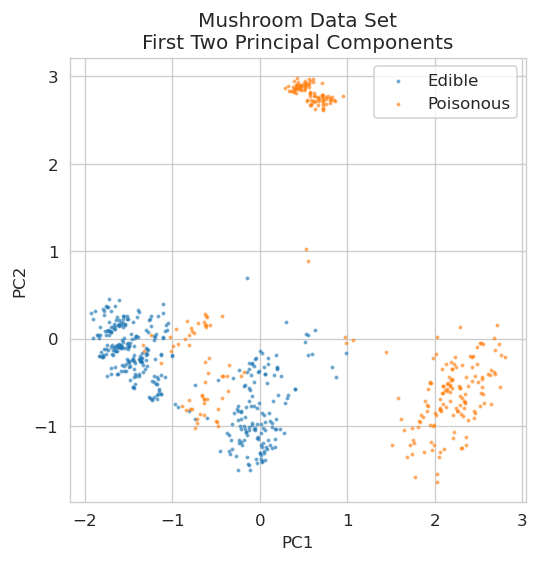

In [6]:
X = df3.iloc[:, 2:]
y = df3.iloc[:, 1]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0, 0], pca[y.values==0, 1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1, 0], pca[y.values==1, 1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [7]:
def plot_mushroom_boundary(X, y, fitted_model):
    plt.figure(figsize=(9.8, 5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1, 2, i+1)
        mesh_step_size = 0.01 # step size in the mesh
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                         verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break

        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0, 0], X[y.values==0, 1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1, 0], X[y.values==1, 1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + str(fitted_model).split('(')[0] + 
                  ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
    plt.show()

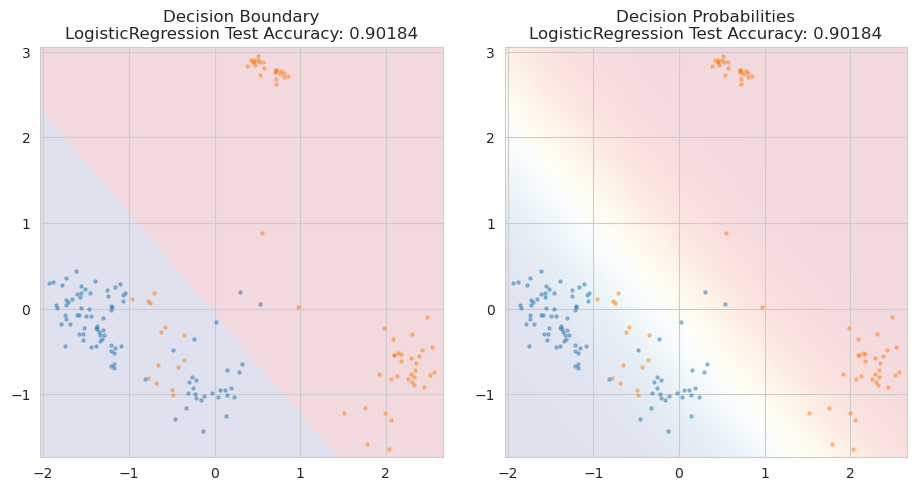

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

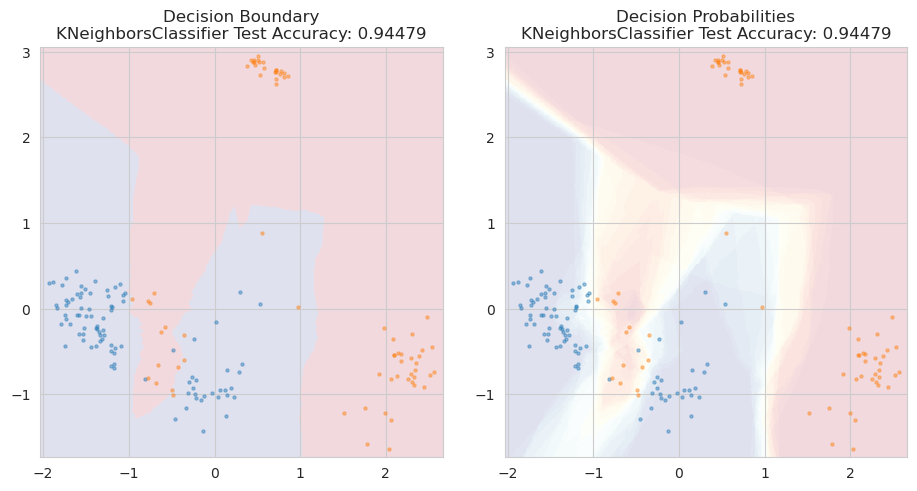

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

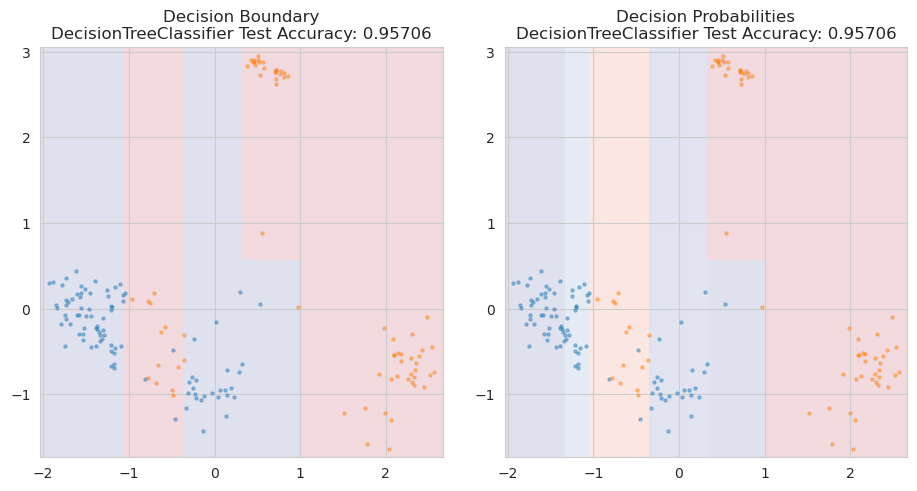

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

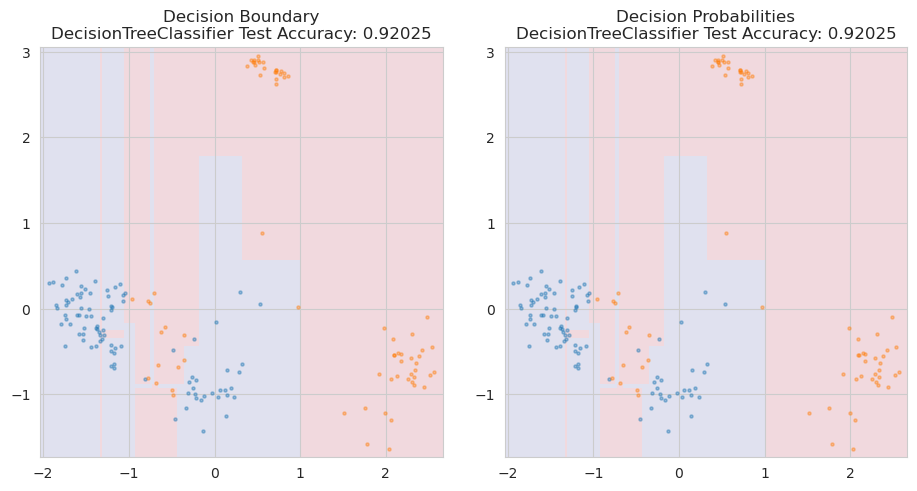

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

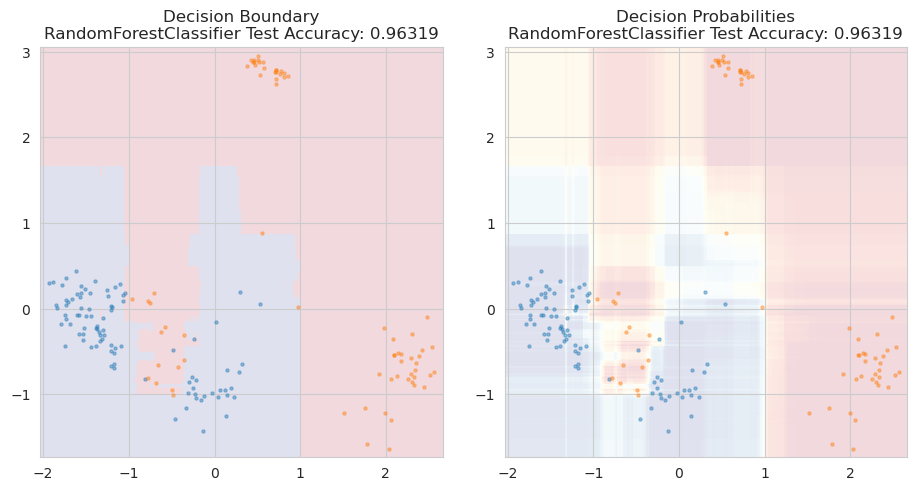

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

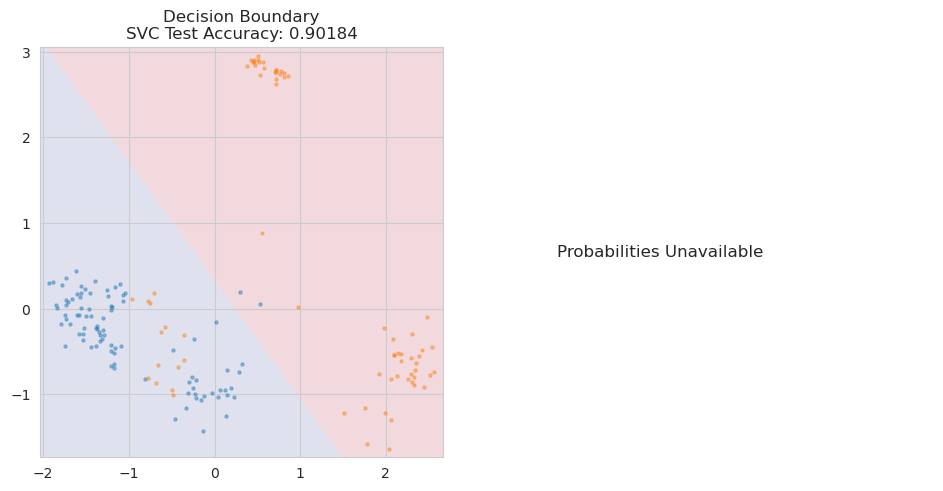

In [13]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

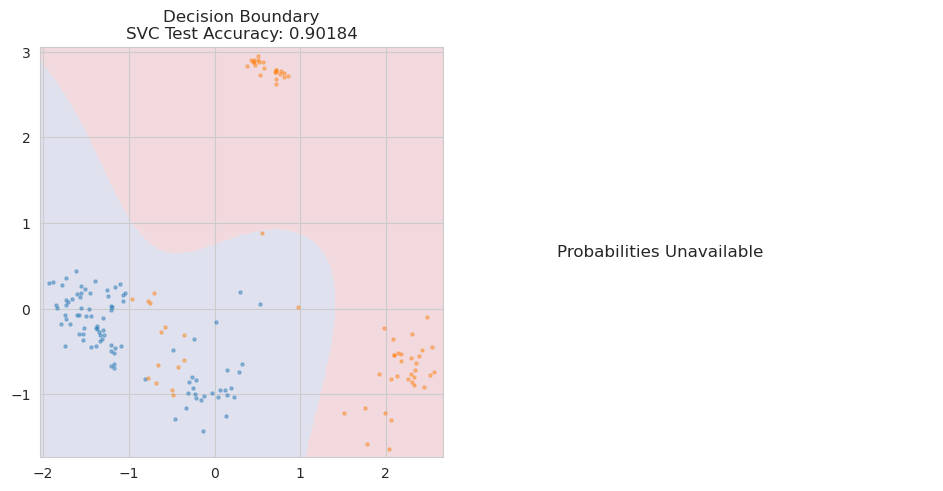

In [14]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

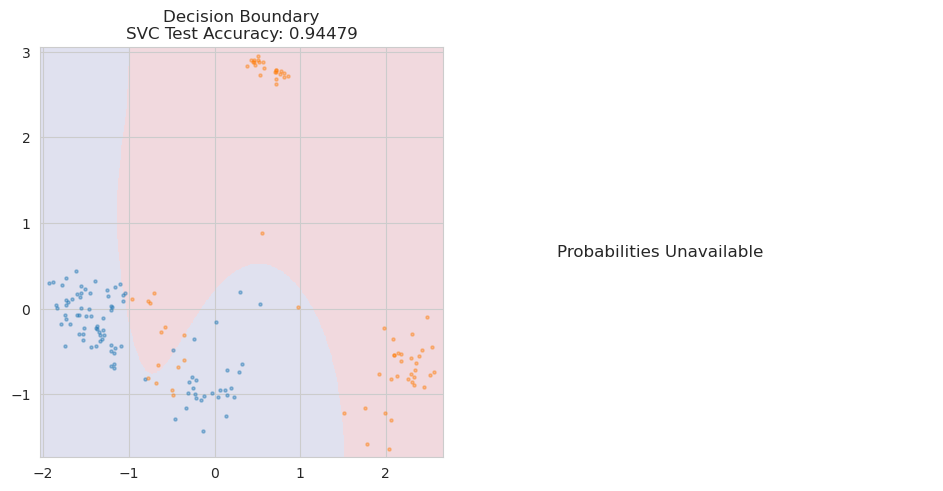

In [15]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

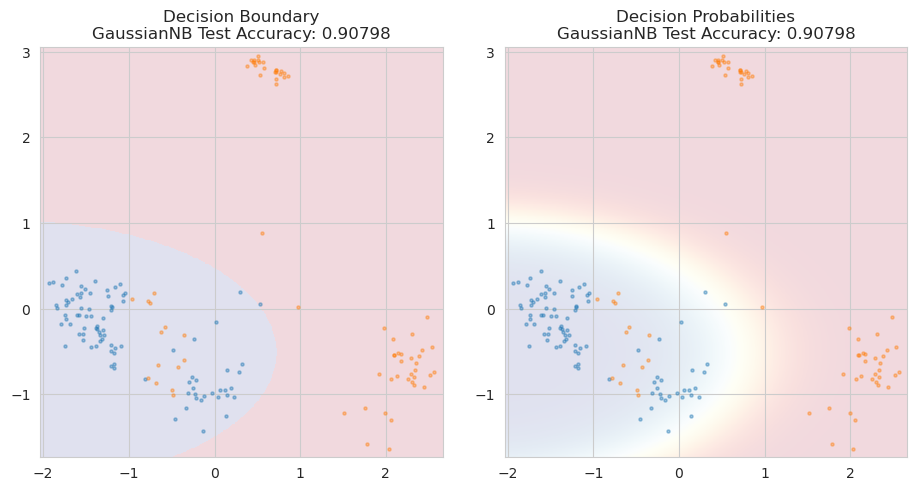

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)

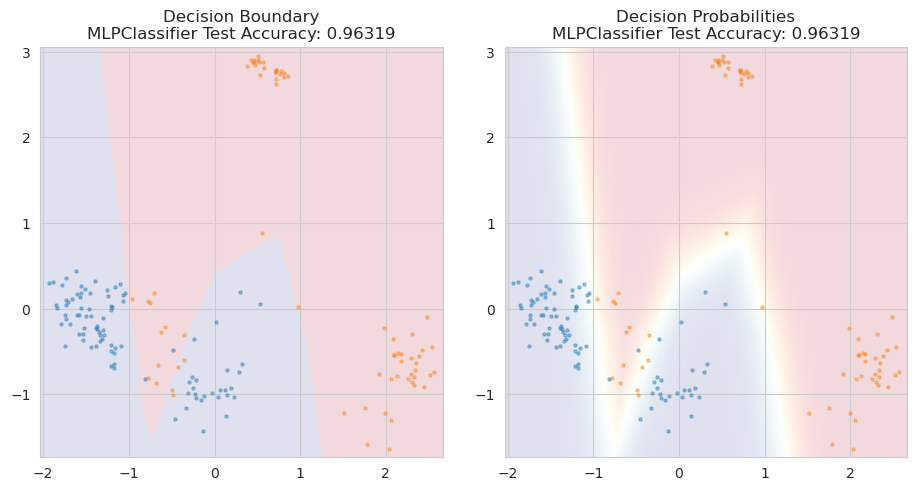

In [17]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)

plot_mushroom_boundary(X_test, y_test, model)